TO MOUNT DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EXTRACTING DATASET ZIPFILE

In [2]:
import zipfile

zip_path = '/content/drive/MyDrive/Herlev_PapSmear.zip'  # Change this to your ZIP file path
extract_path = '/content/dataset'  # Where you want to extract

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img


USING TRAIN FOLDER TO DATA AUGMEMT NEW FOLDER

In [4]:
original_train_dir = '/content/dataset/Herlev Dataset/train'                     # Original training data
augmented_dir = 'augmented_data'

In [5]:
os.makedirs(augmented_dir, exist_ok=True)

# Create class folders inside augmented_dir
for class_name in os.listdir(original_train_dir):
    os.makedirs(os.path.join(augmented_dir, class_name), exist_ok=True)

In [6]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

DATA AUGMENTATION RATE

In [7]:
augmentations_per_image = 13

In [8]:
for class_name in os.listdir(original_train_dir):
    class_path = os.path.join(original_train_dir, class_name)
    output_class_path = os.path.join(augmented_dir, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        # Load and convert to NumPy array
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)  # shape: (1, height, width, channels)

        # Save original image to output
        save_img(os.path.join(output_class_path, img_name), x[0])

        # Generate and save 13 augmented images
        i = 0
        for batch in datagen.flow(x, batch_size=1):
            aug_img_name = f"{os.path.splitext(img_name)[0]}_aug{i+1}.png"
            save_path = os.path.join(output_class_path, aug_img_name)
            save_img(save_path, batch[0])
            i += 1
            if i >= augmentations_per_image:
                break

BALANCING THE CLASSES WITH SAME NUMBER OF IMAGES

In [9]:
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

# Directories
input_dir = '/content/augmented_data'  # Already contains some augmented images
target_per_class = 1794  # Target size for each class

# Data augmentation config
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Count images in each class and augment if needed
for class_name in sorted(os.listdir(input_dir)):
    class_path = os.path.join(input_dir, class_name)
    image_files = [
        f for f in os.listdir(class_path)
        if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))
    ]

    current_count = len(image_files)
    print(f"🔸 {class_name}: {current_count} images")

    if current_count >= target_per_class:
        print(f"✅ {class_name} already has enough images. Skipping.\n")
        continue

    # How many more we need
    needed = target_per_class - current_count
    print(f"🛠️ Augmenting {needed} more images for class: {class_name}")

    # Augment randomly selected images
    i = 0
    while i < needed:
        img_name = random.choice(image_files)
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        for batch in datagen.flow(x, batch_size=1):
            aug_img_name = f"{os.path.splitext(img_name)[0]}_bal{i+1}.png"
            aug_img_path = os.path.join(class_path, aug_img_name)
            save_img(aug_img_path, batch[0])
            i += 1
            if i >= needed:
                break

    print(f"✅ {class_name} is now balanced with {target_per_class} images.\n")


🔸 carcinoma_in_situ: 1365 images
🛠️ Augmenting 429 more images for class: carcinoma_in_situ
✅ carcinoma_in_situ is now balanced with 1794 images.

🔸 light_dysplastic: 1664 images
🛠️ Augmenting 130 more images for class: light_dysplastic
✅ light_dysplastic is now balanced with 1794 images.

🔸 moderate_dysplastic: 1339 images
🛠️ Augmenting 455 more images for class: moderate_dysplastic
✅ moderate_dysplastic is now balanced with 1794 images.

🔸 normal_columnar: 897 images
🛠️ Augmenting 897 more images for class: normal_columnar
✅ normal_columnar is now balanced with 1794 images.

🔸 normal_intermediate: 637 images
🛠️ Augmenting 1157 more images for class: normal_intermediate
✅ normal_intermediate is now balanced with 1794 images.

🔸 normal_superficiel: 663 images
🛠️ Augmenting 1131 more images for class: normal_superficiel
✅ normal_superficiel is now balanced with 1794 images.

🔸 severe_dysplastic: 1794 images
✅ severe_dysplastic already has enough images. Skipping.



In [ ]:
from google.colab import files


In [ ]:
files.download('/content/drive/MyDrive/augmented_data')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install split-folders

SPLITING THE AUGMENTED FOLDER INTO TRAIN,VAL AND TEST

In [ ]:
import splitfolders

splitfolders.ratio(
    "/content/augmented_data",                # Your full dataset path
    output="/content/split_data2",             # Output path for split data
    seed=123,                                 # For reproducibility
    ratio=(0.7,0.1,0.2),                         # 70% training, 10% validation,20% testing
    move=False                                # Set to True if you want to move instead of copy
)


Copying files: 9002 files [00:03, 2430.09 files/s]


CHECKING IF THE FOLDERS ARE SPLITED IN THE CORRECT RATIO

In [ ]:
import os

def count_images_in_folders(base_dir):
    sets = ['train', 'val', 'test']
    total_counts = {}

    for split in sets:
        split_path = os.path.join(base_dir, split)
        if not os.path.exists(split_path):
            print(f"❌ Folder '{split}' not found in {base_dir}")
            continue

        print(f"\n📂 Counting in '{split}' folder:")
        split_total = 0
        for class_name in os.listdir(split_path):
            class_dir = os.path.join(split_path, class_name)
            if not os.path.isdir(class_dir):
                continue

            count = len([
                f for f in os.listdir(class_dir)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))
            ])
            print(f"  - {class_name}: {count} images")
            split_total += count

        total_counts[split] = split_total
        print(f"🔢 Total in '{split}': {split_total} images")

    print("\n📊 Overall Summary:")
    for split in sets:
        print(f"  {split}: {total_counts.get(split, 0)} images")

# Example usage
count_images_in_folders(base_dir="/content/split_data2")  # Replace with your dataset root folder



📂 Counting in 'train' folder:
  - severe_dysplastic: 1247 images
  - light_dysplastic: 1249 images
  - moderate_dysplastic: 1252 images
  - normal_superficiel: 1254 images
  - normal_columnar: 1259 images
  - normal_intermediate: 1256 images
  - carcinoma_in_situ: 1248 images
🔢 Total in 'train': 8765 images

📂 Counting in 'val' folder:
  - severe_dysplastic: 179 images
  - light_dysplastic: 179 images
  - moderate_dysplastic: 181 images
  - normal_superficiel: 178 images
  - normal_columnar: 178 images
  - normal_intermediate: 178 images
  - carcinoma_in_situ: 178 images
🔢 Total in 'val': 1251 images

📂 Counting in 'test' folder:
  - severe_dysplastic: 368 images
  - light_dysplastic: 366 images
  - moderate_dysplastic: 361 images
  - normal_superficiel: 362 images
  - normal_columnar: 357 images
  - normal_intermediate: 360 images
  - carcinoma_in_situ: 368 images
🔢 Total in 'test': 2542 images

📊 Overall Summary:
  train: 8765 images
  val: 1251 images
  test: 2542 images


EFFICIENTNETB0 MODEL


Found 9238 files belonging to 7 classes.
Found 1317 files belonging to 7 classes.
Found 2646 files belonging to 7 classes.
Classes: ['carcinoma_in_situ', 'light_dysplastic', 'moderate_dysplastic', 'normal_columnar', 'normal_intermediate', 'normal_superficiel', 'severe_dysplastic']
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,709,034 (17.96 MB)

 Trainable params: 659,463 (2.52 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 45s 104ms/step - accuracy: 0.5086 - loss: 1.2932 - val_accuracy: 0.7289 - val_loss: 0.7170 - learning_rate: 1.0000e-04
Epoch 2/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 27s 93ms/step - accuracy: 0.7242 - loss: 0.7312 - val_accuracy: 0.7601 - val_loss: 0.6270 - learning_rate: 1.0000e-04
Epoch 3/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.7546 - loss: 0.6290 - val_accuracy: 0.7988 - val_loss: 0.5446 - learning_rate: 1.0000e-04
Epoch 4/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.7891 - loss: 0.5598 - val_accuracy: 0.8162 - val_loss: 0.5018 - learning_rate: 1.0000e-04
Epoch 5/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 25s 87ms/step - accuracy: 0.7979 - loss: 0.5211 - val_accuracy: 0.8231 - val_loss: 0.4722 - learning_rate: 1.0000e-04
Epoch 6/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 26s 90ms/step - accuracy: 0.8129 - loss: 0.4936 - val_accuracy: 0.8368 - val_loss: 0.4445 - learning_rate: 1.0000e-04
Epoch 7/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 48s 116ms/s

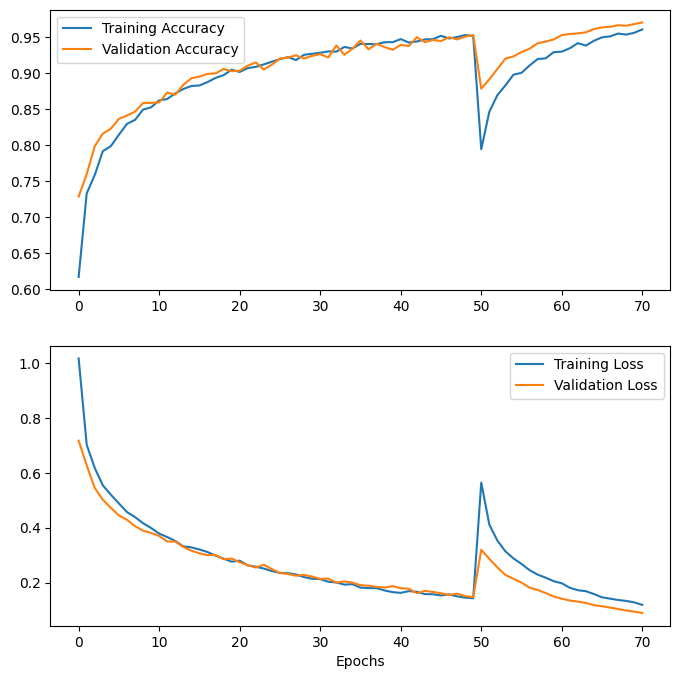

In [ ]:
# Install TensorFlow if needed
# !pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
import os

# Settings
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
EPOCHS = 50

train_ds = image_dataset_from_directory(
    "/content/split_data2/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = image_dataset_from_directory(
    "/content/split_data2/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Load test dataset
test_ds = image_dataset_from_directory(
    "/content/split_data2/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Classes: {class_names}")

# Data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# Build Model
base_model = keras.applications.EfficientNetB0(include_top=False, input_shape=IMG_SIZE + (3,), weights='imagenet')
base_model.trainable = False  # Freeze

inputs = keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# Compile
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Callbacks
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5)
checkpoint = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

# Train initial model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# Fine-tune
base_model.trainable = True
# Freeze first 75% of layers
fine_tune_at = int(len(base_model.layers) * 0.75)
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_epochs = 20
total_epochs = EPOCHS + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n📊 Test Accuracy: {test_acc*100:.2f}%")

# Save final model
model.save('final_cervical_cancer_model.keras')

# Plotting Training Curves
def plot_history(histories):
    acc = []
    val_acc = []
    loss = []
    val_loss = []

    for h in histories:
        acc += h.history['accuracy']
        val_acc += h.history['val_accuracy']
        loss += h.history['loss']
        val_loss += h.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.show()

plot_history([history, history_fine])

CLASSIFICATION REPORT AND CONFUSION MATRIX FOR EFFICIENTNETB0 MODEL

83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step

📝 Classification Report:
                     precision    recall  f1-score   support

  carcinoma_in_situ       0.96      0.96      0.96       381
   light_dysplastic       0.96      0.98      0.97       385
moderate_dysplastic       0.93      0.95      0.94       381
    normal_columnar       0.98      0.98      0.98       373
normal_intermediate       1.00      1.00      1.00       369
 normal_superficiel       1.00      1.00      1.00       370
  severe_dysplastic       0.95      0.90      0.92       387

           accuracy                           0.97      2646
          macro avg       0.97      0.97      0.97      2646
       weighted avg       0.97      0.97      0.97      2646



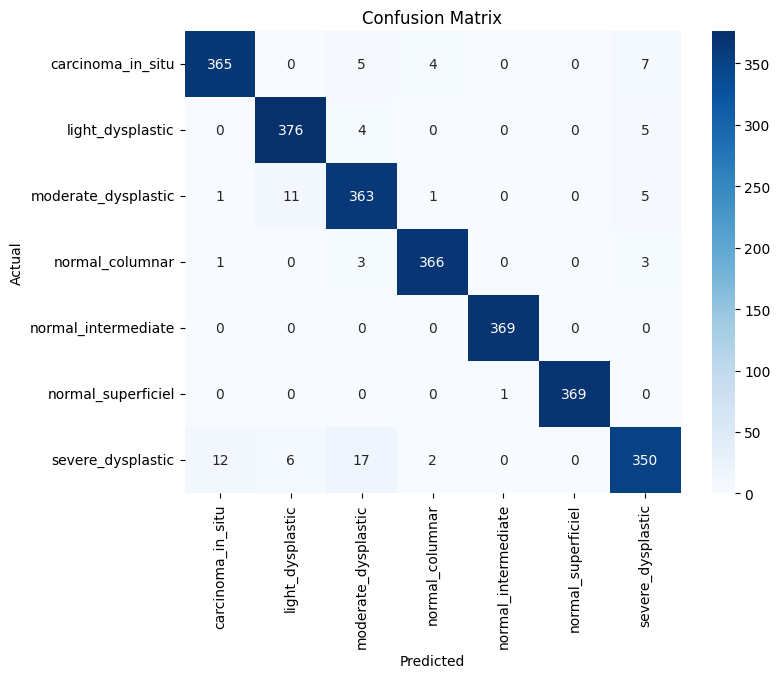

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions and true labels
y_pred = np.argmax(model.predict(test_ds), axis=1)
y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)

# Classification Report
print("\n📝 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


CNN MODEL WITH CLASSIFICATION REPORT,CONFUSION MATRIX,VALIDATION AND TEST ACCURACY

Found 9238 images belonging to 7 classes.
Found 1317 images belonging to 7 classes.
Found 2646 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,941,191 (201.95 MB)

 Trainable params: 52,938,247 (201.94 MB)

 Non-trainable params: 2,944 (11.50 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.5756 - loss: 1.5591

289/289 ━━━━━━━━━━━━━━━━━━━━ 180s 557ms/step - accuracy: 0.5758 - loss: 1.5580 - val_accuracy: 0.1693 - val_loss: 9.2333 - learning_rate: 1.0000e-04
Epoch 2/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.7020 - loss: 0.9262

289/289 ━━━━━━━━━━━━━━━━━━━━ 140s 483ms/step - accuracy: 0.7019 - loss: 0.9262 - val_accuracy: 0.6750 - val_loss: 1.0141 - learning_rate: 1.0000e-04
Epoch 3/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.7099 - loss: 0.8702

289/289 ━━━━━━━━━━━━━━━━━━━━ 148s 512ms/step - accuracy: 0.7100 - loss: 0.8700 - val_accuracy: 0.6887 - val_loss: 0.9899 - learning_rate: 1.0000e-04
Epoch 4/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.7363 - loss: 0.7831

289/289 ━━━━━━━━━━━━━━━━━━━━ 142s 490ms/step - accuracy: 0.7363 - loss: 0.7830 - val_accuracy: 0.7760 - val_loss: 0.6129 - learning_rate: 1.0000e-04
Epoch 5/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.7549 - loss: 0.7054

289/289 ━━━━━━━━━━━━━━━━━━━━ 142s 491ms/step - accuracy: 0.7549 - loss: 0.7053 - val_accuracy: 0.8018 - val_loss: 0.5669 - learning_rate: 1.0000e-04
Epoch 6/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.7824 - loss: 0.6274

289/289 ━━━━━━━━━━━━━━━━━━━━ 149s 515ms/step - accuracy: 0.7823 - loss: 0.6275 - val_accuracy: 0.8474 - val_loss: 0.4091 - learning_rate: 1.0000e-04
Epoch 7/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 136s 471ms/step - accuracy: 0.7865 - loss: 0.5966 - val_accuracy: 0.8216 - val_loss: 0.4791 - learning_rate: 1.0000e-04
Epoch 8/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 135s 465ms/step - accuracy: 0.8020 - loss: 0.5525 - val_accuracy: 0.7707 - val_loss: 0.5951 - learning_rate: 1.0000e-04
Epoch 9/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.7799 - loss: 0.6013

289/289 ━━━━━━━━━━━━━━━━━━━━ 154s 534ms/step - accuracy: 0.7800 - loss: 0.6012 - val_accuracy: 0.8664 - val_loss: 0.3984 - learning_rate: 1.0000e-04
Epoch 10/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.8085 - loss: 0.5339

289/289 ━━━━━━━━━━━━━━━━━━━━ 141s 486ms/step - accuracy: 0.8085 - loss: 0.5338 - val_accuracy: 0.8443 - val_loss: 0.3811 - learning_rate: 1.0000e-04
Epoch 11/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.8105 - loss: 0.5296

289/289 ━━━━━━━━━━━━━━━━━━━━ 143s 488ms/step - accuracy: 0.8105 - loss: 0.5296 - val_accuracy: 0.8770 - val_loss: 0.3394 - learning_rate: 1.0000e-04
Epoch 12/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 461ms/step - accuracy: 0.8269 - loss: 0.4670 - val_accuracy: 0.8808 - val_loss: 0.3428 - learning_rate: 1.0000e-04
Epoch 13/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 457ms/step - accuracy: 0.8420 - loss: 0.4299 - val_accuracy: 0.8778 - val_loss: 0.3419 - learning_rate: 1.0000e-04
Epoch 14/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 459ms/step - accuracy: 0.8497 - loss: 0.3934 - val_accuracy: 0.7001 - val_loss: 1.4167 - learning_rate: 1.0000e-04
Epoch 15/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.8244 - loss: 0.4797

289/289 ━━━━━━━━━━━━━━━━━━━━ 140s 486ms/step - accuracy: 0.8245 - loss: 0.4795 - val_accuracy: 0.9058 - val_loss: 0.2590 - learning_rate: 1.0000e-04
Epoch 16/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 460ms/step - accuracy: 0.8648 - loss: 0.3738 - val_accuracy: 0.8360 - val_loss: 0.4784 - learning_rate: 1.0000e-04
Epoch 17/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 459ms/step - accuracy: 0.8583 - loss: 0.3818 - val_accuracy: 0.8937 - val_loss: 0.3143 - learning_rate: 1.0000e-04
Epoch 18/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 131s 454ms/step - accuracy: 0.8654 - loss: 0.3593 - val_accuracy: 0.8618 - val_loss: 0.4166 - learning_rate: 1.0000e-04
Epoch 19/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 461ms/step - accuracy: 0.8653 - loss: 0.3559 - val_accuracy: 0.8443 - val_loss: 0.4517 - learning_rate: 1.0000e-04
Epoch 20/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.8911 - loss: 0.2987

289/289 ━━━━━━━━━━━━━━━━━━━━ 140s 485ms/step - accuracy: 0.8912 - loss: 0.2987 - val_accuracy: 0.8998 - val_loss: 0.2567 - learning_rate: 5.0000e-05
Epoch 21/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.9063 - loss: 0.2542

289/289 ━━━━━━━━━━━━━━━━━━━━ 144s 497ms/step - accuracy: 0.9063 - loss: 0.2542 - val_accuracy: 0.9385 - val_loss: 0.1850 - learning_rate: 5.0000e-05
Epoch 22/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 132s 456ms/step - accuracy: 0.9062 - loss: 0.2455 - val_accuracy: 0.8815 - val_loss: 0.3774 - learning_rate: 5.0000e-05
Epoch 23/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 460ms/step - accuracy: 0.9058 - loss: 0.2590 - val_accuracy: 0.9279 - val_loss: 0.2225 - learning_rate: 5.0000e-05
Epoch 24/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.9166 - loss: 0.2235

289/289 ━━━━━━━━━━━━━━━━━━━━ 147s 507ms/step - accuracy: 0.9166 - loss: 0.2236 - val_accuracy: 0.9522 - val_loss: 0.1422 - learning_rate: 5.0000e-05
Epoch 25/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.9225 - loss: 0.2076

289/289 ━━━━━━━━━━━━━━━━━━━━ 138s 478ms/step - accuracy: 0.9225 - loss: 0.2076 - val_accuracy: 0.9552 - val_loss: 0.1316 - learning_rate: 5.0000e-05
Epoch 26/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 134s 463ms/step - accuracy: 0.9239 - loss: 0.2234 - val_accuracy: 0.9377 - val_loss: 0.1944 - learning_rate: 5.0000e-05
Epoch 27/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 132s 458ms/step - accuracy: 0.9229 - loss: 0.2044 - val_accuracy: 0.9089 - val_loss: 0.2801 - learning_rate: 5.0000e-05
Epoch 28/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 460ms/step - accuracy: 0.9289 - loss: 0.1941 - val_accuracy: 0.9355 - val_loss: 0.1849 - learning_rate: 5.0000e-05
Epoch 29/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 134s 463ms/step - accuracy: 0.9307 - loss: 0.1865 - val_accuracy: 0.8808 - val_loss: 0.3463 - learning_rate: 5.0000e-05
Epoch 30/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 458ms/step - accuracy: 0.9386 - loss: 0.1665 - val_accuracy: 0.9339 - val_loss: 0.1787 - learning_rate: 2.5000e-05
Epoch 31/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 44

289/289 ━━━━━━━━━━━━━━━━━━━━ 154s 502ms/step - accuracy: 0.9392 - loss: 0.1638 - val_accuracy: 0.9613 - val_loss: 0.1250 - learning_rate: 2.5000e-05
Epoch 32/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 189s 457ms/step - accuracy: 0.9473 - loss: 0.1497 - val_accuracy: 0.8975 - val_loss: 0.3438 - learning_rate: 2.5000e-05
Epoch 33/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 460ms/step - accuracy: 0.9398 - loss: 0.1561 - val_accuracy: 0.8610 - val_loss: 0.4701 - learning_rate: 2.5000e-05
Epoch 34/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 132s 457ms/step - accuracy: 0.9480 - loss: 0.1466 - val_accuracy: 0.9468 - val_loss: 0.1539 - learning_rate: 2.5000e-05
Epoch 35/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 459ms/step - accuracy: 0.9573 - loss: 0.1331 - val_accuracy: 0.9377 - val_loss: 0.1938 - learning_rate: 2.5000e-05
Epoch 36/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.9565 - loss: 0.1210

289/289 ━━━━━━━━━━━━━━━━━━━━ 139s 482ms/step - accuracy: 0.9565 - loss: 0.1210 - val_accuracy: 0.9674 - val_loss: 0.0993 - learning_rate: 1.2500e-05
Epoch 37/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 459ms/step - accuracy: 0.9609 - loss: 0.1107 - val_accuracy: 0.9188 - val_loss: 0.2495 - learning_rate: 1.2500e-05
Epoch 38/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 132s 455ms/step - accuracy: 0.9622 - loss: 0.1091 - val_accuracy: 0.9628 - val_loss: 0.1149 - learning_rate: 1.2500e-05
Epoch 39/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 132s 457ms/step - accuracy: 0.9578 - loss: 0.1146 - val_accuracy: 0.9590 - val_loss: 0.1348 - learning_rate: 1.2500e-05
Epoch 40/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.9639 - loss: 0.1050

289/289 ━━━━━━━━━━━━━━━━━━━━ 149s 516ms/step - accuracy: 0.9639 - loss: 0.1050 - val_accuracy: 0.9674 - val_loss: 0.0955 - learning_rate: 1.2500e-05
Epoch 41/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 184s 453ms/step - accuracy: 0.9656 - loss: 0.1030 - val_accuracy: 0.9567 - val_loss: 0.1272 - learning_rate: 1.2500e-05
Epoch 42/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 134s 463ms/step - accuracy: 0.9617 - loss: 0.1025 - val_accuracy: 0.9279 - val_loss: 0.1952 - learning_rate: 1.2500e-05
Epoch 43/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 131s 453ms/step - accuracy: 0.9633 - loss: 0.1103 - val_accuracy: 0.9484 - val_loss: 0.1536 - learning_rate: 1.2500e-05
Epoch 44/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.9673 - loss: 0.1004

289/289 ━━━━━━━━━━━━━━━━━━━━ 156s 501ms/step - accuracy: 0.9673 - loss: 0.1004 - val_accuracy: 0.9787 - val_loss: 0.0640 - learning_rate: 1.2500e-05
Epoch 45/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 132s 456ms/step - accuracy: 0.9681 - loss: 0.0970 - val_accuracy: 0.9636 - val_loss: 0.1014 - learning_rate: 1.2500e-05
Epoch 46/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 134s 465ms/step - accuracy: 0.9635 - loss: 0.0993 - val_accuracy: 0.9248 - val_loss: 0.2364 - learning_rate: 1.2500e-05
Epoch 47/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 139s 455ms/step - accuracy: 0.9673 - loss: 0.0953 - val_accuracy: 0.9810 - val_loss: 0.0667 - learning_rate: 1.2500e-05
Epoch 48/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 133s 460ms/step - accuracy: 0.9685 - loss: 0.0894 - val_accuracy: 0.9332 - val_loss: 0.1959 - learning_rate: 1.2500e-05
Epoch 49/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 131s 454ms/step - accuracy: 0.9712 - loss: 0.0855 - val_accuracy: 0.9560 - val_loss: 0.1268 - learning_rate: 6.2500e-06
Epoch 50/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 132s 

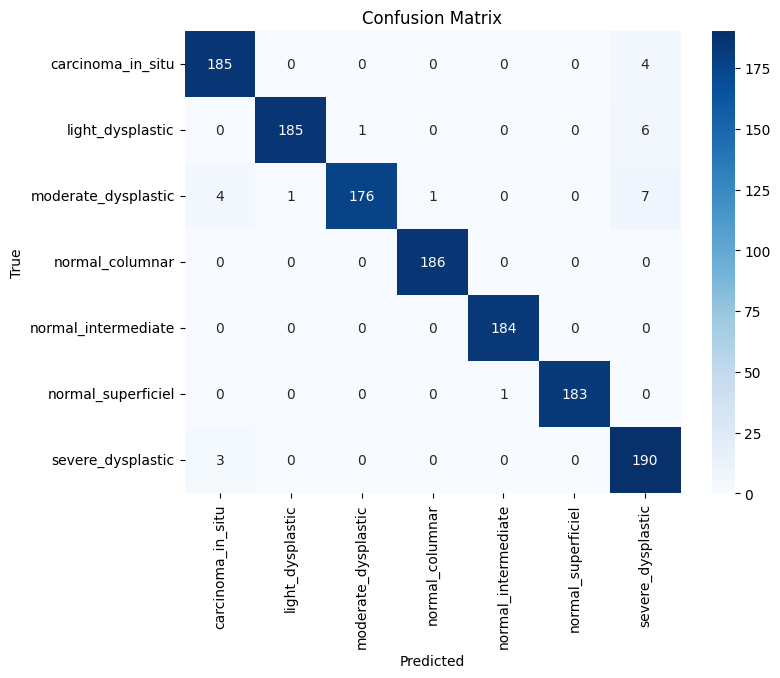

 1/83 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 1.0000 - loss: 0.0107

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.9783 - loss: 0.0752

📊 Test Accuracy: 97.85%
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step

📝 Test Set Classification Report:
                     precision    recall  f1-score   support

  carcinoma_in_situ       0.96      0.98      0.97       381
   light_dysplastic       0.99      0.98      0.98       385
moderate_dysplastic       0.99      0.93      0.96       381
    normal_columnar       0.99      1.00      1.00       373
normal_intermediate       0.99      1.00      0.99       369
 normal_superficiel       1.00      0.99      1.00       370
  severe_dysplastic       0.94      0.97      0.95       387

           accuracy                           0.98      2646
          macro avg       0.98      0.98      0.98      2646
       weighted avg       0.98      0.98      0.98      2646



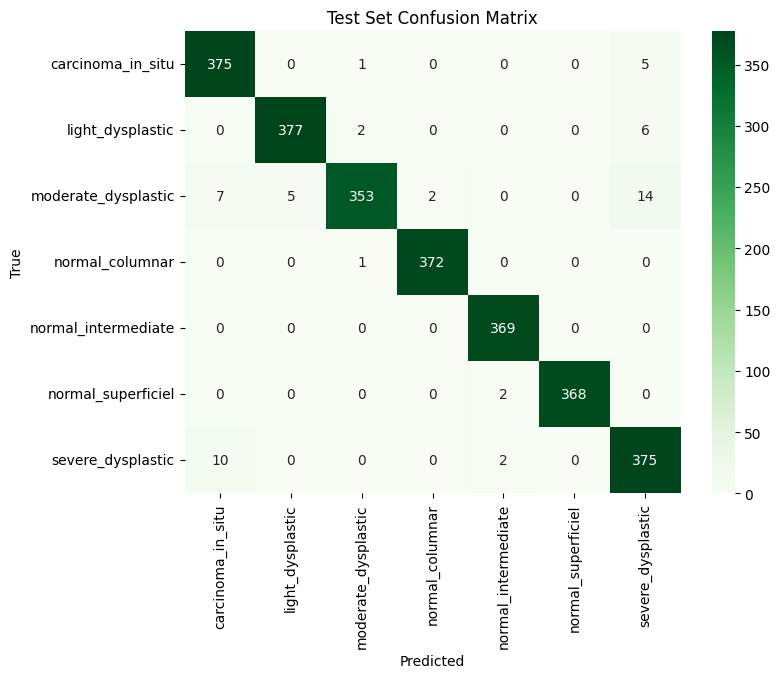

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import cv2

# Paths
train_path = '/content/split_data2/train'
val_path = '/content/split_data2/val'
test_path = '/content/split_data2/test'


# Image and batch size
IMAGE_SIZE = 224
BATCH_SIZE = 32

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


NUM_CLASSES = train_generator.num_classes
class_labels = list(val_generator.class_indices.keys())

# Improved CNN Model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='last_conv'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Callbacks
early_stop = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
checkpoint = callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
lr_schedule = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4)

# Training
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint, lr_schedule]
)

# Evaluation
val_loss, val_acc = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_acc * 100:.2f}%")

# Predictions
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()# Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n📊 Test Accuracy: {test_acc * 100:.2f}%")

# Test Set Predictions
y_test_pred = model.predict(test_generator)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true = test_generator.classes

# Classification Report for Test Set
print("\n📝 Test Set Classification Report:")
print(classification_report(y_test_true, y_test_pred_classes, target_names=class_labels))

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test_true, y_test_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Set Confusion Matrix")
plt.show()


VISION TRANSFORMERS MODEL

In [ ]:
# ✅ STEP 1: INSTALL DEPENDENCIES
!pip install -q transformers timm torchvision

# ✅ STEP 2: IMPORTS
import os
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from torch.utils.data import DataLoader
from transformers import ViTFeatureExtractor, ViTForImageClassification
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# ✅ STEP 3: SET DEVICE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ✅ STEP 4: LOAD FEATURE EXTRACTOR
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
image_size = feature_extractor.size['height']

# ✅ STEP 5: DATA TRANSFORMS
transform = Compose([
    Resize((image_size, image_size)),
    ToTensor(),
    Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
])

# ✅ STEP 6: DATASET PATHS
train_path = "/content/split_data2/train"
val_path = "/content/split_data2/val"
test_path = "/content/split_data2/test"


# ✅ STEP 7: LOAD DATA
train_dataset = datasets.ImageFolder(train_path, transform=transform)
val_dataset = datasets.ImageFolder(val_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)


num_classes = len(train_dataset.classes)
class_names = train_dataset.classes

# ✅ STEP 8: LOAD MODEL
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=num_classes
)
model.to(device)

# ✅ STEP 9: TRAINING SETUP
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# ✅ STEP 10: TRAINING LOOP
def train_model(model, train_loader, val_loader, epochs=5):
    for epoch in range(epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(pixel_values=images).logits
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        acc = correct / total
        print(f"Epoch {epoch+1}: Train Loss = {total_loss:.4f}, Train Accuracy = {acc*100:.2f}%")

        # Validation
        model.eval()
        val_preds, val_labels = [], []

        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                outputs = model(pixel_values=images).logits
                preds = torch.argmax(outputs, dim=1).cpu().numpy()

                val_preds.extend(preds)
                val_labels.extend(labels.numpy())

        val_acc = accuracy_score(val_labels, val_preds)
        print(f"          Val Accuracy = {val_acc*100:.2f}%")

    return model

# ✅ STEP 11: START TRAINING
trained_model = train_model(model, train_loader, val_loader, epochs=5)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.1 MB/s eta 0:00:00
Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1: Train Loss = 406.4081, Train Accuracy = 82.93%
          Val Accuracy = 87.70%
Epoch 2: Train Loss = 99.2250, Train Accuracy = 97.19%
          Val Accuracy = 97.65%
Epoch 3: Train Loss = 43.3276, Train Accuracy = 99.01%
          Val Accuracy = 97.80%
Epoch 4: Train Loss = 26.8710, Train Accuracy = 99.29%
          Val Accuracy = 98.86%
Epoch 5: Train Loss = 20.4707, Train Accuracy = 99.36%
          Val Accuracy = 98.25%


TEST ACCURACY AND CLASSIFICATION REPORT FOR VIT MODEL

In [ ]:
def test_model(model, test_loader):
    model.eval()
    test_preds, test_labels = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(pixel_values=images).logits
            preds = torch.argmax(outputs, dim=1).cpu().numpy()

            test_preds.extend(preds)
            test_labels.extend(labels.numpy())

    test_acc = accuracy_score(test_labels, test_preds)
    print(f"\n✅ Test Accuracy = {test_acc*100:.2f}%")
    print("\n📄 Classification Report on Test Set:")
    print(classification_report(test_labels, test_preds, target_names=class_names))

In [ ]:
test_model(trained_model, test_loader)


✅ Test Accuracy = 98.68%

📄 Classification Report on Test Set:
                     precision    recall  f1-score   support

  carcinoma_in_situ       0.96      1.00      0.98       381
   light_dysplastic       0.99      0.99      0.99       385
moderate_dysplastic       0.99      0.98      0.99       381
    normal_columnar       0.99      1.00      0.99       373
normal_intermediate       1.00      1.00      1.00       369
 normal_superficiel       1.00      1.00      1.00       370
  severe_dysplastic       0.98      0.95      0.96       387

           accuracy                           0.99      2646
          macro avg       0.99      0.99      0.99      2646
       weighted avg       0.99      0.99      0.99      2646



GRADCAM AND SOME EXAMPLES


EXAMPLE 01

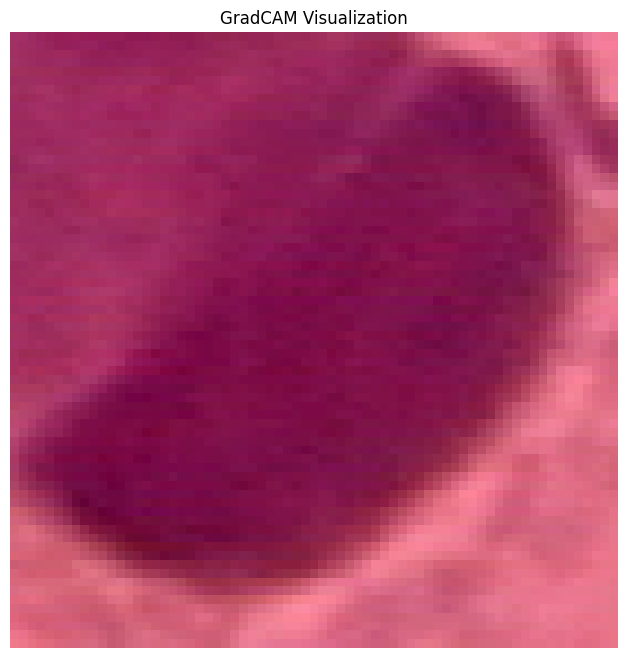

In [ ]:
# ✅ IMPORTS
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# ✅ GradCAM Utilities
def normalize_cam(cam):
    cam = np.maximum(cam, 0)
    cam = cam / (cam.max() + 1e-5)
    return cam

def generate_vit_gradcam(model, image_tensor, device):
    model.eval()
    image_tensor = image_tensor.unsqueeze(0).to(device)

    activations = []
    gradients = []

    def forward_hook(module, input, output):
        activations.append(output)

    def backward_hook(module, grad_in, grad_out):
        gradients.append(grad_out[0])

    # Hook into last encoder block's output
    target_layer = model.vit.encoder.layer[-1].output
    fwd_handle = target_layer.register_forward_hook(forward_hook)
    bwd_handle = target_layer.register_full_backward_hook(backward_hook)

    outputs = model(pixel_values=image_tensor).logits
    pred_class = outputs.argmax(dim=1)
    loss = outputs[:, pred_class]

    model.zero_grad()
    loss.backward()

    grads = gradients[0]     # (batch_size, seq_len, hidden_dim)
    acts = activations[0]    # (batch_size, seq_len, hidden_dim)

    weights = grads.mean(dim=-1)  # (batch_size, seq_len)
    cam = (weights.unsqueeze(-1) * acts).sum(dim=1)  # (batch_size, seq_len)

    cam = cam.squeeze(0)  # Remove batch
    cam = normalize_cam(cam.cpu().detach().numpy())

    cam = cam[1:]  # Remove CLS token

    # ✅ Now make cam square
    num_patches = cam.shape[0]  # 767
    side = int(np.ceil(np.sqrt(num_patches)))  # 28

    pad_len = (side * side) - num_patches  # 784 - 767 = 17
    cam = np.pad(cam, (0, pad_len), mode='constant')  # Pad 0s

    cam = cam.reshape(side, side)

    # ✅ Convert to torch tensor and interpolate to (224, 224)
    cam = torch.tensor(cam).unsqueeze(0).unsqueeze(0)  # (1, 1, side, side)
    cam = torch.nn.functional.interpolate(cam, size=(224, 224), mode='bilinear', align_corners=False)
    cam = cam.squeeze().numpy()

    fwd_handle.remove()
    bwd_handle.remove()

    return cam

# ✅ Visualization
def show_gradcam(img_path, model, transform, device):
    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img)

    cam = generate_vit_gradcam(model, img_tensor, device)

    # Upsample CAM to match image
    cam = cv2.resize(cam, (img.width, img.height))
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    img_np = np.array(img) / 255

    superimposed_img = heatmap + img_np
    superimposed_img = superimposed_img / np.max(superimposed_img)

    plt.figure(figsize=(8, 8))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.title('GradCAM Visualization')
    plt.show()

# ✅ Example usage
img_path = "/content/split_data2/test/carcinoma_in_situ/149143370-149143378-001.BMP"  # your image path
show_gradcam(img_path, trained_model, transform, device)

EXAMPLE 02

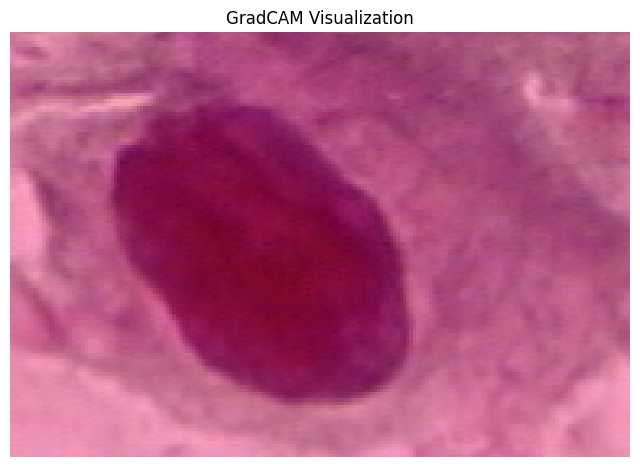

In [ ]:
# ✅ IMPORTS
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# ✅ GradCAM Utilities
def normalize_cam(cam):
    cam = np.maximum(cam, 0)
    cam = cam / (cam.max() + 1e-5)
    return cam

def generate_vit_gradcam(model, image_tensor, device):
    model.eval()
    image_tensor = image_tensor.unsqueeze(0).to(device)

    activations = []
    gradients = []

    def forward_hook(module, input, output):
        activations.append(output)

    def backward_hook(module, grad_in, grad_out):
        gradients.append(grad_out[0])

    # Hook into last encoder block's output
    target_layer = model.vit.encoder.layer[-1].output
    fwd_handle = target_layer.register_forward_hook(forward_hook)
    bwd_handle = target_layer.register_full_backward_hook(backward_hook)

    outputs = model(pixel_values=image_tensor).logits
    pred_class = outputs.argmax(dim=1)
    loss = outputs[:, pred_class]

    model.zero_grad()
    loss.backward()

    grads = gradients[0]     # (batch_size, seq_len, hidden_dim)
    acts = activations[0]    # (batch_size, seq_len, hidden_dim)

    weights = grads.mean(dim=-1)  # (batch_size, seq_len)
    cam = (weights.unsqueeze(-1) * acts).sum(dim=1)  # (batch_size, seq_len)

    cam = cam.squeeze(0)  # Remove batch
    cam = normalize_cam(cam.cpu().detach().numpy())

    cam = cam[1:]  # Remove CLS token

    # ✅ Now make cam square
    num_patches = cam.shape[0]  # 767
    side = int(np.ceil(np.sqrt(num_patches)))  # 28

    pad_len = (side * side) - num_patches  # 784 - 767 = 17
    cam = np.pad(cam, (0, pad_len), mode='constant')  # Pad 0s

    cam = cam.reshape(side, side)

    # ✅ Convert to torch tensor and interpolate to (224, 224)
    cam = torch.tensor(cam).unsqueeze(0).unsqueeze(0)  # (1, 1, side, side)
    cam = torch.nn.functional.interpolate(cam, size=(224, 224), mode='bilinear', align_corners=False)
    cam = cam.squeeze().numpy()

    fwd_handle.remove()
    bwd_handle.remove()

    return cam

# ✅ Visualization
def show_gradcam(img_path, model, transform, device):
    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img)

    cam = generate_vit_gradcam(model, img_tensor, device)

    # Upsample CAM to match image
    cam = cv2.resize(cam, (img.width, img.height))
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    img_np = np.array(img) / 255

    superimposed_img = heatmap + img_np
    superimposed_img = superimposed_img / np.max(superimposed_img)

    plt.figure(figsize=(8, 8))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.title('GradCAM Visualization')
    plt.show()

# ✅ Example usage
img_path = "/content/split_data2/val/severe_dysplastic/149056321-149056343-001.BMP"  # your image path
show_gradcam(img_path, trained_model, transform, device)